<a href="https://colab.research.google.com/github/palashsharma891/ShakespeareStyleTextGeneration/blob/main/Shakespeare_Special_Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2022-05-31 07:51:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.217.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-05-31 07:51:16 (161 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 14s 10ms/step - loss: 6.9024 - accuracy: 0.0225
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4959 - accuracy: 0.0213
Epoch 3/100
484/484 [==============================] - 5s 9ms/step - loss: 6.3901 - accuracy: 0.0270
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2573 - accuracy: 0.0330
Epoch 5/100
484/484 [==============================] - 5s 10ms/step - loss: 6.1555 - accuracy: 0.0363
Epoch 6/100
484/484 [==============================] - 7s 15ms/step - loss: 6.0716 - accuracy: 0.0406
Epoch 7/100
484/484 [==============================] - 8s 16ms/step - loss: 5.9873 - accuracy: 0.0435
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 5.8893 - accuracy: 0.0484
Epoch 9/100
484/484 [==============================] - 5s 10ms/step - loss: 5.7873 - accuracy: 0.0559
Epoch 10/100
484/484 [==============================] - 5s 10ms/step - loss: 5.681

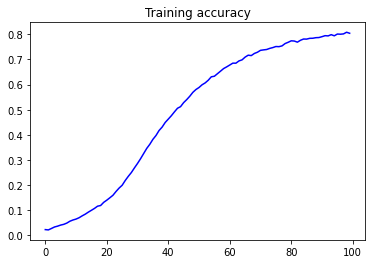

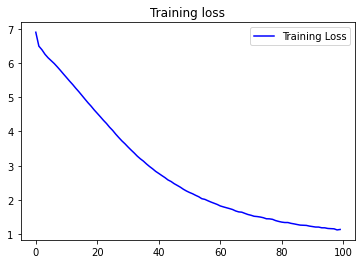

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predict_x = model.predict(token_list) 
	predicted = np.argmax(predict_x,axis=1)
  #predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope wilt thou art bright true strife play make dwell them but gives good hate spent pride ' did change ' give me tend light ill pride life bearing be loss my deeds to despise assure another ill well still repair die bright wrong report gone bright glory bright life back go or well smells hate night dear wrong age can bevel date part seem die live good leaves leaves o'er make pleasure part back leaves leaves had clearer light warm'd dyed warm'd skill tongue clearer light light light stand days go wide child did bright clearer light grow mad held


In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(GRU(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 300)          226800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               120600    
                                                                 
 dense_2 (Dense)             (None, 1605)              162105    
                                                                 
 dense_3 (Dense)             (None, 3211)              5156866   
                                                      

In [12]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 8s 9ms/step - loss: 6.9079 - accuracy: 0.0228
Epoch 2/100
484/484 [==============================] - 4s 9ms/step - loss: 6.4848 - accuracy: 0.0226
Epoch 3/100
484/484 [==============================] - 4s 9ms/step - loss: 6.3351 - accuracy: 0.0323
Epoch 4/100
484/484 [==============================] - 4s 9ms/step - loss: 6.1800 - accuracy: 0.0382
Epoch 5/100
484/484 [==============================] - 4s 9ms/step - loss: 6.0326 - accuracy: 0.0435
Epoch 6/100
484/484 [==============================] - 4s 9ms/step - loss: 5.8864 - accuracy: 0.0514
Epoch 7/100
484/484 [==============================] - 4s 9ms/step - loss: 5.7333 - accuracy: 0.0600
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 5.5879 - accuracy: 0.0701
Epoch 9/100
484/484 [==============================] - 4s 9ms/step - loss: 5.4394 - accuracy: 0.0768
Epoch 10/100
484/484 [==============================] - 4s 9ms/step - loss: 5.2883 - accur

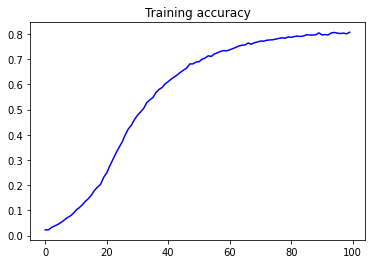

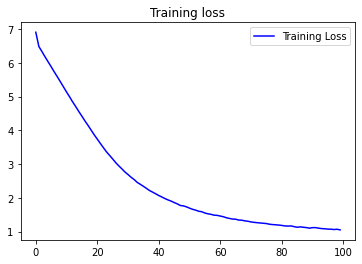

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predict_x = model.predict(token_list) 
	predicted = np.argmax(predict_x,axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope that must my friend ' being near another way place true face not told but more had live and less by thine eye master open doth look into my deeds with youth her delight than hot time's glory did stand when her dear been receives mute doth spend sit sit sit grow mad 'tis now but thee twain dyed light confounds him when heaven's sun infection commits days confounds down her blot her true stain when heaven's hot waste nor dun open cold did give down on store within away and hot store her hate' her blot the heaven or
